### Reading data

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

data = loadmat('a1_voc_resp.mat')
est_data = data['est_data']

data = loadmat('a1_voc_specgram.mat')
sg = data['sg']

Here we choose one of the 176 neurons to analyse. For each neuron, it was recorded 4 times the response of that neuron to each of 40 different sound stimuli from a ferret. The Neuron_ID is the ID of the specific neuron, the Stimulus_ID is the ID of the sound stimuli and the Repetition_ID is in case we want to analyze the spike time directly, which means that we have it recorded 4 times.

In [171]:
Neuron_ID = 167 # From 0 to 175
Stimulus_ID = 21 # From 0 to 39
Repetition_ID = 2 # From 0 to 3

Aux = est_data[0,Neuron_ID]
Cellname = Aux[0][0]
Spiketimes = Aux[1][Repetition_ID][Stimulus_ID][:,0] # in ms
PSTH = Aux[2][:,Stimulus_ID] # sampled in 100 Hz
Sound_onset = Aux[3][0] # in seconds

The following code plot the spike times for each of the repetitions of the session given a stimulus and a neuron

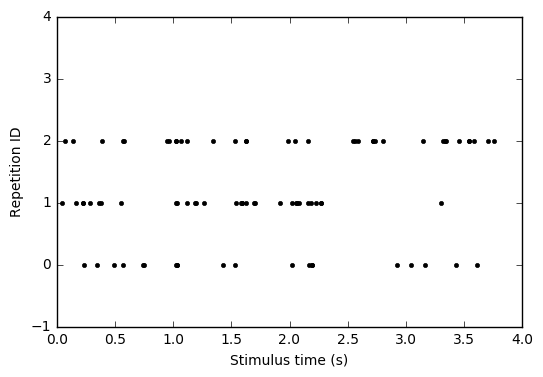

In [182]:
Stimulus_ID = 1

Spiketimes = Aux[1][0][Stimulus_ID][:,0]
plt.plot(Spiketimes/1000, 0*np.ones([len(Spiketimes)]),'k.')

Spiketimes = Aux[1][1][Stimulus_ID][:,0]
plt.plot(Spiketimes/1000, 1*np.ones([len(Spiketimes)]),'k.')

Spiketimes = Aux[1][2][Stimulus_ID][:,0]
plt.plot(Spiketimes/1000, 2*np.ones([len(Spiketimes)]),'k.')

# Spiketimes = Aux[1][3][Stimulus_ID][:,0]
# plt.plot(Spiketimes, 3*np.ones([len(Spiketimes)]),'k.')

plt.ylim([-1,4])
plt.xlabel('Stimulus time (s)')
plt.ylabel('Repetition ID')
plt.show()

The following code plots the PSTH given a neuron and a stimulus

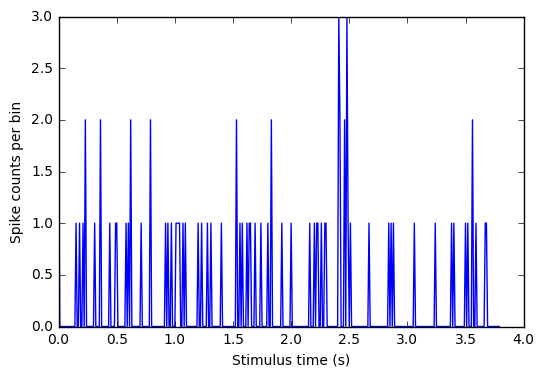

In [186]:
x = np.arange(0,3.8,0.01)
Number_of_repetitions = 3
plt.plot(x,Number_of_repetitions*PSTH)
plt.xlabel('Stimulus time (s)')
plt.ylabel('Spike counts per bin')
plt.show()

Here we are plotting the specgram of a specific stimulus

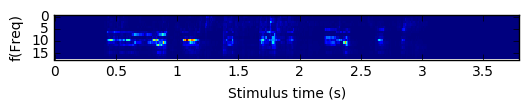

In [239]:
Stimulus_ID = 6
specgram = sg[0][0][0][:,:,Stimulus_ID]

fig, ax = plt.subplots()

ax.imshow(specgram, interpolation = 'nearest',aspect = 2)
ax.set_xticklabels([0,0,0.5,1,1.5,2,2.5,3,3.5])
plt.xlabel('Stimulus time (s)')
plt.ylabel('f(Freq)')
plt.show()
